<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0701_37%EC%9D%BC%EC%B0%A8_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
model = Sequential()
model.add(Conv2D(2, (3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(3, (2, 2), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

Conv2D(2, (3, 3)

필터 (2 커널 사이즈(3,3))

padding = 'same'

*패딩?

same =  입력과 출력을 같게 한다. 그래서 padding을 같게 해야한다.

same대신 valid가 들어갈 수 있는데 valid는 패딩을 안하는거랑 같다

input_shape=(8, 8, 1)
1은 필터의 C

Flatten = Dense layer를 위해 펼치는 곳


# Input_shape

batch_size = 입력층으로 한번에 입력되는 자료의 개수

(batch_size, rows, columns, channels): data_format= 'channels_last'


(batch_size,channels, rows, columns): data_format= 'channels_first'

일반적으로 input_shape = (rows,columns,channels)를 사용한다.



# output_shape

(batch_size, filters, new_rows, now_colums): data_format = 'channels_first'

(batch_size, new_rows, now_colums,filters): data_format = 'channels_last'

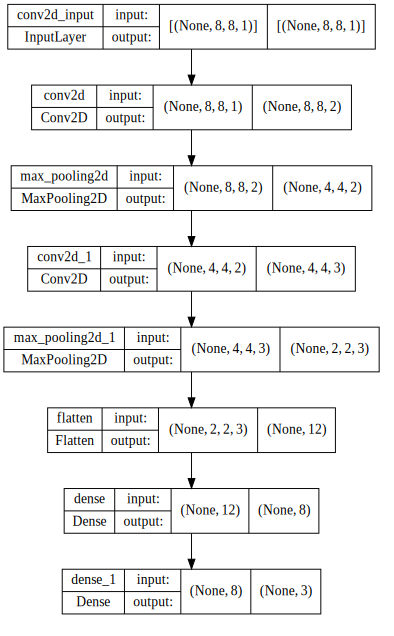

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs=12, validation_data=(x_test, y_test), verbose=2)

Epoch 1/12
469/469 - 5s - loss: 0.2340 - accuracy: 0.9286 - val_loss: 0.0491 - val_accuracy: 0.9852 - 5s/epoch - 10ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0852 - accuracy: 0.9741 - val_loss: 0.0369 - val_accuracy: 0.9875 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0318 - val_accuracy: 0.9887 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0285 - val_accuracy: 0.9894 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 5s - loss: 0.0414 - accuracy: 0.9880 - val_loss: 0.0260 - val_accuracy: 0.9915 - 5s/epoch - 10ms/step
Epoch 6/12
469/469 - 6s - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0288 - val_accuracy: 0.9914 - 6s/epoch - 12ms/step
Epoch 7/12
469/469 - 6s - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0254 - val_accuracy: 0.9919 - 6s/epoch - 12ms/step
Epoch 8/12
469/469 - 5s - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0277 - val_accuracy: 0.9910 - 5s/epoch - 11ms/step
Epoch 9/12
469/469 

In [ ]:
loss_and_metrics = cnn.evaluate(x_test, y_test, batch_size=128)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

79/79 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.9225
## evaluation loss and_metrics ##
[0.22600220143795013, 0.9225000143051147]


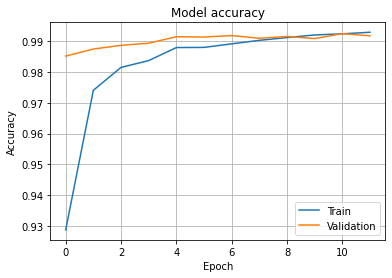

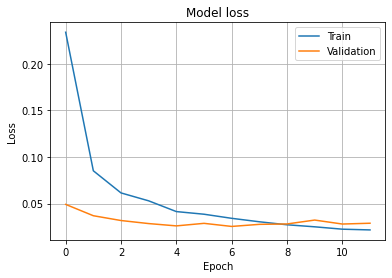

In [ ]:
#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

#손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


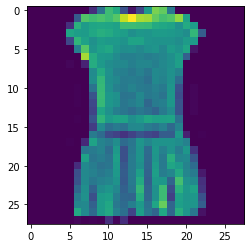

In [ ]:
plt.imshow(x_train[3])

train_images는 0에서 255 사이의 값을 갖는 28x28 크기의 NumPy 어레이를 갖는 어레이이고,

train_labels는 0에서 9까지의 정수 값을 갖는 어레이입니다.

0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블입니다. 각각의 레이블과 클래스는 아래와 같습니다.

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs=12, validation_data=(x_test, y_test), verbose=2)

Epoch 1/12
469/469 - 5s - loss: 0.5290 - accuracy: 0.8134 - val_loss: 0.3433 - val_accuracy: 0.8742 - 5s/epoch - 10ms/step
Epoch 2/12
469/469 - 4s - loss: 0.3440 - accuracy: 0.8775 - val_loss: 0.2891 - val_accuracy: 0.8935 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.2961 - accuracy: 0.8936 - val_loss: 0.2712 - val_accuracy: 0.8981 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.2648 - accuracy: 0.9032 - val_loss: 0.2455 - val_accuracy: 0.9087 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.2390 - accuracy: 0.9135 - val_loss: 0.2448 - val_accuracy: 0.9120 - 4s/epoch - 9ms/step
Epoch 6/12
469/469 - 4s - loss: 0.2228 - accuracy: 0.9183 - val_loss: 0.2255 - val_accuracy: 0.9178 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.2051 - accuracy: 0.9238 - val_loss: 0.2224 - val_accuracy: 0.9194 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 4s - loss: 0.1915 - accuracy: 0.9293 - val_loss: 0.2204 - val_accuracy: 0.9181 - 4s/epoch - 8ms/step
Epoch 9/12
469/469 - 4s

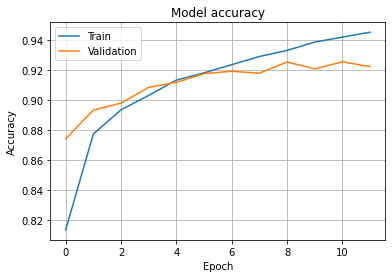

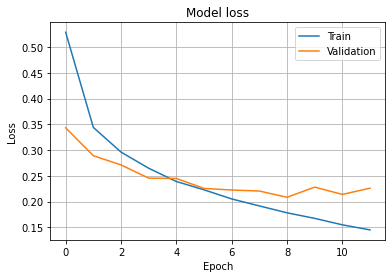

In [ ]:
#정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

#손실함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'best')
plt.grid()
plt.show()

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs=12, validation_data=(x_test, y_test), verbose=2)

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

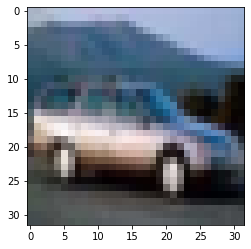

In [ ]:
plt.imshow(x_train[4])

In [ ]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

In [ ]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.5))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 128, epochs=15, validation_data=(x_test, y_test), verbose=2)

Epoch 1/15
391/391 - 5s - loss: 1.6622 - accuracy: 0.3974 - val_loss: 1.2483 - val_accuracy: 0.5615 - 5s/epoch - 12ms/step
Epoch 2/15
391/391 - 4s - loss: 1.3177 - accuracy: 0.5300 - val_loss: 1.1014 - val_accuracy: 0.6130 - 4s/epoch - 11ms/step
Epoch 3/15
391/391 - 4s - loss: 1.1906 - accuracy: 0.5798 - val_loss: 1.0198 - val_accuracy: 0.6505 - 4s/epoch - 11ms/step
Epoch 4/15
391/391 - 4s - loss: 1.1102 - accuracy: 0.6080 - val_loss: 0.9595 - val_accuracy: 0.6714 - 4s/epoch - 11ms/step
Epoch 5/15
391/391 - 4s - loss: 1.0488 - accuracy: 0.6319 - val_loss: 0.9273 - val_accuracy: 0.6788 - 4s/epoch - 11ms/step
Epoch 6/15
391/391 - 4s - loss: 1.0125 - accuracy: 0.6418 - val_loss: 0.8994 - val_accuracy: 0.6914 - 4s/epoch - 10ms/step
Epoch 7/15
391/391 - 4s - loss: 0.9726 - accuracy: 0.6545 - val_loss: 0.9010 - val_accuracy: 0.6882 - 4s/epoch - 10ms/step
Epoch 8/15
391/391 - 4s - loss: 0.9372 - accuracy: 0.6675 - val_loss: 0.8745 - val_accuracy: 0.6980 - 4s/epoch - 10ms/step
Epoch 9/15
391/3

In [ ]:
loss_and_metrics = cnn.evaluate(x_test, y_test, batch_size=128)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

79/79 [==============================] - 1s 6ms/step - loss: 0.8088 - accuracy: 0.7228
## evaluation loss and_metrics ##
[0.8087584376335144, 0.7228000164031982]


In [ ]:
res = cnn.evaluate(x_test, y_test, verbose=0)
print('정확률은', res[1]*100)

정확률은 71.64000272750854


In [ ]:
model = Sequential()

#-- layer 1
model.add(Conv2D(64, 3, 3,activation='relu',input_shape=(32, 32,3)))
model.add(Dropout(0.5))  
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))


    ##-- layer 4
model.add(Flatten())
model.add(Dense(512, activation='relu'))

    #-- layer 5
model.add(Dense(512, activation='relu'))

    #-- layer 6
model.add(Dense(512, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size = 512, epochs=15, validation_data=(x_test, y_test), verbose=2)

Epoch 1/15
98/98 - 4s - loss: 0.7200 - accuracy: 0.7417 - val_loss: 0.7914 - val_accuracy: 0.7284 - 4s/epoch - 43ms/step
Epoch 2/15
98/98 - 3s - loss: 0.7030 - accuracy: 0.7470 - val_loss: 0.7916 - val_accuracy: 0.7250 - 3s/epoch - 32ms/step
Epoch 3/15
98/98 - 3s - loss: 0.6911 - accuracy: 0.7504 - val_loss: 0.7881 - val_accuracy: 0.7275 - 3s/epoch - 32ms/step
Epoch 4/15
98/98 - 3s - loss: 0.6917 - accuracy: 0.7508 - val_loss: 0.7875 - val_accuracy: 0.7252 - 3s/epoch - 32ms/step
Epoch 5/15
98/98 - 3s - loss: 0.6775 - accuracy: 0.7561 - val_loss: 0.7836 - val_accuracy: 0.7312 - 3s/epoch - 31ms/step
Epoch 6/15
98/98 - 3s - loss: 0.6706 - accuracy: 0.7564 - val_loss: 0.7855 - val_accuracy: 0.7269 - 3s/epoch - 32ms/step
Epoch 7/15
98/98 - 3s - loss: 0.6626 - accuracy: 0.7613 - val_loss: 0.7884 - val_accuracy: 0.7324 - 3s/epoch - 32ms/step
Epoch 8/15
98/98 - 3s - loss: 0.6542 - accuracy: 0.7631 - val_loss: 0.7750 - val_accuracy: 0.7290 - 3s/epoch - 32ms/step
Epoch 9/15
98/98 - 3s - loss: 0.

In [ ]:
loss_and_metrics = cnn.evaluate(x_test, y_test, verbose=0)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

## evaluation loss and_metrics ##
[0.7769280672073364, 0.7317000031471252]


# 태양광 먼지 유무

1. 데이터 준비

데이터는 임의의 해상도를 가진 이미지에 각 픽셀마다 0과 1을 표시

만들어진 이미지에서 1의 총 개수를 각 이미지에 넣기

In [ ]:
import numpy as np

In [ ]:
import random

In [ ]:
def generate_image(a=None, width=16,height=16): 
    '''
        array : 특정 픽셀에 1 이 찍혀 있는 배열, 나머지는 0
        nop : array 에 있는 1의 개수, 정답 역활을 한다. 
        
        resolution = 256
        number_of_points 는 찍혀야 할 점의 개수 : 2, 40, 140, 54......
        idx : 점들의 위치 인덱스 ex> 점이 2개인 경우에는 idx = [11, 250]
        row_list = [0, 0, .., 1, 0, 0, ... 1, 0, 0, ..]
        array = 11, 250만 1인 16x16 배열
        nop = array([2])
    '''
    random.seed(a)
    resolution = range(width*height)
    number_of_points = random.choice(resolution)
    idx = random.sample(resolution,number_of_points)
    row_list = [1 if (i in idx) else 0 for i in resolution]
    array = np.array(row_list).reshape(width, height)
    nop = np.array([number_of_points])
    return (array, nop)


# data set 만들기
def data_set(samples):
    ds_x = []
    ds_y = []
    for i in range(samples):
        x,y = generate_image(i)
        ds_x.append(x)
        ds_y.append(y)
    ds_x = np.array(ds_x)
    ds_y = np.array(ds_y)
    return (ds_x, ds_y)


In [ ]:
x_train, y_train = data_set(1500)
x_val, y_val = data_set(300)
x_test, y_test = data_set(100)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1500, 16, 16), (1500, 1), (100, 16, 16), (100, 1))

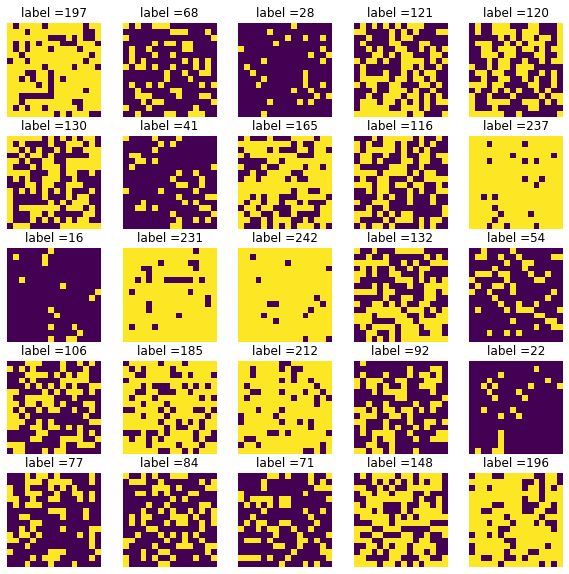

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt_row = 5
plt_col =5

plt.rcParams['figure.figsize'] = (10,10)
f, ax = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = ax[i//plt_row, i%plt_col]
    sub_plt.imshow(x_train[i])
    sub_plt.set_title('label =' + str(y_train[i][0]))
    sub_plt.axis('off')
plt.show()

1. Dense layer만 사용해서 모델 생성

2. Conv2D를 사용해서

3. 회귀식 loss= mse, metrics = ['mae']